# Data analysis products

In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
articles = pd.read_csv('../../raw_data/articles.csv')

In [56]:
pd.set_option('display.max_columns', None)

In [57]:
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

# Baseline la plus nulle

In [130]:
articles.columns

Index(['article_id', 'product_type_name', 'graphical_appearance_name',
       'perceived_colour_master_name', 'section_name', 'garment_group_name',
       'Red', 'Green', 'Blue'],
      dtype='object')

In [30]:
articles = articles[['article_id','garment_group_name']] 
articles.head()

,article_id,garment_group_name
0,108775015,Jersey Basic
1,108775044,Jersey Basic
2,108775051,Jersey Basic
3,110065001,"Under-, Nightwear"
4,110065002,"Under-, Nightwear"


In [31]:
articles_baseline = pd.get_dummies(articles.garment_group_name) 
articles_baseline['article_id'] = articles['article_id']
articles_baseline

,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,...,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby,article_id
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108775015
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108775044
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,108775051
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,110065001
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,110065002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,953450001
105538,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,953763001
105539,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,956217002
105540,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,957375001


In [106]:
def cluster_csv_articles():
    features = list(articles_baseline.columns)
    features_name_formatted = [name.replace('/','_') for name in features]
    for i in range(0,22):
        c = articles_baseline.loc[articles_baseline[features[i]] == 1]
        c['article_id'].to_csv(f'{features_name_formatted[i]}.csv')
        
    

In [67]:
cluster_csv_articles()

# Baseline un peu moins nulle

In [3]:
articles = articles[['article_id','graphical_appearance_name', 
        'perceived_colour_master_name',
       'section_name','garment_group_name','index_group_name']]

#I explain why I drop these features:
#detail desc is probably more interesting if you used NLP and Deep. 
#garment_group_no as I keep groupname and OHE it
#'section_no' as I keep section_name and OHE it after having grouped them together
#'index_code', 'index_name','index_group_no', 'index_group_name', 
#'colour_group_code', 'colour_group_name','perceived_colour_value_id', 'perceived_colour_value_name','perceived_colour_master_id', 'perceived_colour_master_name', as we have perceived_colour_master_name' already and OHE

### garment_group_name

As this is a very important set of features, we OHE without more details.

In [75]:
articles.garment_group_name.unique()

array(['Jersey Basic', 'Under-, Nightwear', 'Socks and Tights',
       'Jersey Fancy', 'Accessories', 'Trousers Denim', 'Outdoor',
       'Shoes', 'Swimwear', 'Knitwear', 'Shirts', 'Trousers', 'Dressed',
       'Shorts', 'Dresses Ladies', 'Skirts', 'Special Offers', 'Blouses',
       'Unknown', 'Woven/Jersey/Knitted mix Baby', 'Dresses/Skirts girls'],
      dtype=object)

In [76]:
articles = pd.concat([articles,pd.get_dummies(articles.garment_group_name)], axis = 1).drop(columns = ['garment_group_name'])

In [4]:
articles

,article_id,graphical_appearance_name,perceived_colour_master_name,section_name,garment_group_name,index_group_name
0,108775015,Solid,Black,Womens Everyday Basics,Jersey Basic,Ladieswear
1,108775044,Solid,White,Womens Everyday Basics,Jersey Basic,Ladieswear
2,108775051,Stripe,White,Womens Everyday Basics,Jersey Basic,Ladieswear
3,110065001,Solid,Black,Womens Lingerie,"Under-, Nightwear",Ladieswear
4,110065002,Solid,White,Womens Lingerie,"Under-, Nightwear",Ladieswear
...,...,...,...,...,...,...
105537,953450001,Placement print,Black,Men Underwear,Socks and Tights,Menswear
105538,953763001,Solid,Black,H&M+,Jersey Fancy,Ladieswear
105539,956217002,Solid,Black,Womens Trend,Jersey Fancy,Ladieswear
105540,957375001,Solid,Black,Divided Accessories,Accessories,Divided


### Pattern treatment

Seeing that the majority of the items are Solid (that is, without a pattern), Denim, or, consisting in one of the many patterns, I grouped the numerous categories into these three options.

In [60]:
def pattern_transformer(string):
    if 'Solid' in string:
        return 'Solid'
    if 'Denim' in string:
        return 'Denim'
    else:
        return 'Patterns'

In [61]:
articles['graphical_appearance_name'] = articles['graphical_appearance_name'].apply(pattern_transformer)

In [62]:
articles= pd.concat([articles,pd.get_dummies(articles.graphical_appearance_name)], axis = 1).drop('graphical_appearance_name',1)

/tmp/ipykernel_21088/1936145184.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles= pd.concat([articles,pd.get_dummies(articles.graphical_appearance_name)], axis = 1).drop('graphical_appearance_name',1)


In [63]:
articles

,article_id,perceived_colour_master_name,section_name,garment_group_name,index_group_name,Denim,Patterns,Solid
0,108775015,Black,Womens Everyday Basics,Jersey Basic,Ladieswear,0,0,1
1,108775044,White,Womens Everyday Basics,Jersey Basic,Ladieswear,0,0,1
2,108775051,White,Womens Everyday Basics,Jersey Basic,Ladieswear,0,1,0
3,110065001,Black,Womens Lingerie,"Under-, Nightwear",Ladieswear,0,0,1
4,110065002,White,Womens Lingerie,"Under-, Nightwear",Ladieswear,0,0,1
...,...,...,...,...,...,...,...,...
105537,953450001,Black,Men Underwear,Socks and Tights,Menswear,0,1,0
105538,953763001,Black,H&M+,Jersey Fancy,Ladieswear,0,0,1
105539,956217002,Black,Womens Trend,Jersey Fancy,Ladieswear,0,0,1
105540,957375001,Black,Divided Accessories,Accessories,Divided,0,0,1


### Section_name and index_group_name treatement 

I basically kept track of:
- the gender via two columns (when the category is mixed I put a 1 in both) 
- a weaker version of the age, that is "kid, baby, adult". I suspect that this will have redundancy with the treatment done by Naceur, but it doesn't cost me much to add it anyways, we'll see.

Also, I added a feature obese for pregnant women and plus sized (not very PR).


In [64]:
female_list = ['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 'Baby Essentials & Complements',
       'Mama', 'Womens Small accessories',
        'Divided Basics',
       'Girls Underwear & Basics', 
       'Womens Big accessories', 'Divided Accessories',
       'Womens Swimwear, beachwear', 'Divided Selected',
        'Contemporary Street',
       'Contemporary Casual', 
       'Womens Everyday Collection', 'H&M+',
       'Divided Collection', 'Ladies Denim', 'Contemporary Smart',
       'Womens Trend', 'Kids Outerwear', 'Young Girl', 'Womens Shoes',
       'Womens Tailoring', 'Divided Projects', 
       'Womens Jackets', 'Womens Casual',
       'Kids Accessories, Swimwear & D', 'Ladies H&M Sport',
       'Kids & Baby Shoes', 'Baby Girl', 'Kids Girl',
       'Divided Complements Other', 'Womens Premium',
       'Special Collections', 'Kids Sports',
       'Collaborations', 'Divided Asia keys', 'EQ Divided',
       'Kids Local Relevance', 'Ladies Other']
               
male_list = ['Baby Essentials & Complements',
       'Men Underwear', 
       'Men H&M Sport', 'Kids Boy', 'Divided Basics',
        'Mens Outerwear',
        'Divided Accessories',
        'Divided Selected',
       'Boys Underwear & Basics', 'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
        'Men Shoes', 'Young Boy',
       'Divided Collection',  'Contemporary Smart',
       'Kids Outerwear',
       'Divided Projects', 'Denim Men', 'Men Other',
        'Men Other 2', 'Baby Boy',
       'Kids Accessories, Swimwear & D', 
       'Kids & Baby Shoes', 
       'Divided Complements Other', 
       'Special Collections', 'Kids Sports', 'Men Project', 'Men Edition',
       'Collaborations', 'Divided Asia keys', 'EQ Divided',
       'Kids Local Relevance']
               
kid_list = ['Kids Boy',
       'Girls Underwear & Basics', 'Kids Outerwear', 'Young Girl', 
       'Kids Accessories', 'Kids & Baby Shoes', 'Kids Girl','Kids Sports',
       'Kids Local Relevance']

teen_list = ['Divided Basics',
      'Divided Accessories',
    'Divided Selected',
       'Divided Collection', 'Divided Projects', 
       'Divided Complements Other', 'Divided Asia keys', 'EQ Divided']

adult_list = ['Womens Everyday Basics', 'Womens Lingerie',
       'Womens Nightwear, Socks & Tigh', 
       'Men Underwear', 'Mama', 'Womens Small accessories',
       'Men H&M Sport',
       'Girls Underwear & Basics', 'Mens Outerwear',
       'Womens Big accessories', 
       'Womens Swimwear, beachwear', 
       'Contemporary Street',
       'Contemporary Casual', 'Men Accessories', 'Men Suits & Tailoring',
       'Womens Everyday Collection', 'Men Shoes', 'H&M+',
       'Ladies Denim', 'Contemporary Smart',
       'Womens Trend',  'Womens Shoes',
       'Womens Tailoring', 'Denim Men', 'Men Other',
       'Womens Jackets', 'Men Other 2', 'Womens Casual',
   'Swimwear & D', 'Ladies H&M Sport',
       'Womens Premium',
       'Special Collections', 'Men Edition',
       'Collaborations', 'Ladies Other']

baby_list = ['Baby Essentials & Complements',
       'Baby Boy', 
       'Kids & Baby Shoes', 'Baby Girl',]

obese_list = ['H&M+','Mama']

def gender_transformer_female(string):
    if string in female_list:
        return 1
    else:
        return 0

def gender_transformer_male(string):
    if string in male_list:
        return 1
    else:
        return 0

def age_transformer_kid(string):
    if string in kid_list:
        return 1
    else:
        return 0

def age_transformer_baby(string):
    if string in baby_list:
        return 1
    else:
        return 0

def age_transformer_teen(string):
    if string in teen_list:
        return 1
    else:
        return 0

def age_transformer_adult(string):
    if string in adult_list:
        return 1
    else:
        return 0
    
def obese_transformer(string):
    if string in obese_list:
        return 1
    else:
        return 0

In [65]:
articles['adult'] = articles['section_name']
articles['teenager'] = articles['section_name']
articles['kid'] = articles['section_name']
articles['baby']  = articles['section_name']

articles['male']  =  articles['index_group_name']
articles['female'] = articles['index_group_name']

articles['obese'] = articles['section_name']


In [66]:
articles['obese'] = articles['obese'].apply(obese_transformer)

articles['male'] = articles['male'] .apply(gender_transformer_male)
articles['female'] = articles['female'] .apply(gender_transformer_female)


articles['adult']  = articles['adult'] .apply(age_transformer_adult)
articles['teenager']  = articles['teenager'] .apply(age_transformer_teen)
articles['kid']  = articles['kid'] .apply(age_transformer_kid)
articles['baby']  = articles['baby'] .apply(age_transformer_baby)



In [67]:
articles.drop('section_name',1, inplace = True)
articles.drop('index_group_name',1,inplace = True)

/tmp/ipykernel_21088/2694664386.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles.drop('section_name',1, inplace = True)
/tmp/ipykernel_21088/2694664386.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles.drop('index_group_name',1,inplace = True)


In [68]:
articles

,article_id,perceived_colour_master_name,garment_group_name,Denim,Patterns,Solid,adult,teenager,kid,baby,male,female,obese
0,108775015,Black,Jersey Basic,0,0,1,1,0,0,0,0,0,0
1,108775044,White,Jersey Basic,0,0,1,1,0,0,0,0,0,0
2,108775051,White,Jersey Basic,0,1,0,1,0,0,0,0,0,0
3,110065001,Black,"Under-, Nightwear",0,0,1,1,0,0,0,0,0,0
4,110065002,White,"Under-, Nightwear",0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,Black,Socks and Tights,0,1,0,1,0,0,0,0,0,0
105538,953763001,Black,Jersey Fancy,0,0,1,1,0,0,0,0,0,1
105539,956217002,Black,Jersey Fancy,0,0,1,1,0,0,0,0,0,0
105540,957375001,Black,Accessories,0,0,1,0,1,0,0,0,0,0


In [ ]:
pd.concat([articles,pd.get_dummies(articles.graphical_appearance_name)], axis = 1).drop(columns = ['graphical_appearance_name'])

### Colour treatment
We pass them in RGB to limit the number of columns that would be obtained by doing a OHE

In [69]:
articles['perceived_colour_master_name'].unique()

array(['Black', 'White', 'Beige', 'Grey', 'Blue', 'Pink', 'Lilac Purple',
       'Red', 'Mole', 'Orange', 'Metal', 'Brown', 'Turquoise', 'Yellow',
       'Khaki green', 'Green', 'undefined', 'Unknown', 'Yellowish Green',
       'Bluish Green'], dtype=object)

In [70]:
articles['Red'] = articles['perceived_colour_master_name']
articles['Green'] = articles['perceived_colour_master_name']
articles['Blue'] = articles['perceived_colour_master_name']


In [71]:
# 'undefined',
# 'Unknown',

dico_couleurs_r = {'Black':0.0,'White':255.0, 'Beige':245,'Grey':128.0,'undefined':121.5224339392088, 'Unknown':121.5224339392088,
 'Blue':0.0,
 'Pink':255.0,
 'Lilac Purple':200.0,
 'Red':255,
 'Mole':57,
 'Orange':255.0,
 'Metal':70,
 'Brown':128.0,
 'Turquoise':224,
 'Yellow':255,
 'Khaki green':138,
 'Green':0,
 'Yellowish Green':154.0,
 'Bluish Green':13.0}

dico_couleurs_g = {'Black':0.0,'White':255.0, 'Beige':245,'Grey':128.0,'undefined':101.59318199175195, 'Unknown':101.59318199175195,
 'Blue':0,
 'Pink':192,
 'Lilac Purple':162.0,
 'Red':0,
 'Mole':45,
 'Orange':165.0,
 'Metal':71,
 'Brown':0.0,
 'Turquoise':64,
 'Yellow':255,
 'Khaki green':134,
 'Green':255,
 'Yellowish Green':205.0,
 'Bluish Green':152}

dico_couleurs_b = {'Black':0.0,'White':255.0, 'Beige':220,'Grey':128.0,'undefined':127.15378226668703, 'Unknown':127.15378226668703,
 'Blue':255.0,
 'Pink':203.0,        
 'Lilac Purple':200.0,
 'Red':0,
 'Mole':43,
 'Orange':0.0,
 'Metal':62,
 'Brown':0.0,
 'Turquoise':208,
 'Yellow':0,
 'Khaki green':93,
 'Green':0,
 'Yellowish Green':50.0,
 'Bluish Green':186}

In [72]:
articles['Red'] = articles['Red'].map(dico_couleurs_r)
articles['Green'] = articles['Green'].map(dico_couleurs_g)
articles['Blue'] = articles['Blue'].map(dico_couleurs_b)

In [78]:
articles.drop('perceived_colour_master_name',1,inplace = True)

/tmp/ipykernel_21088/2317408271.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  articles.drop('perceived_colour_master_name',1,inplace = True)


In [79]:
articles

,article_id,Denim,Patterns,Solid,adult,teenager,kid,baby,male,female,obese,Red,Green,Blue,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,Shoes,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby
0,108775015,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,108775044,0,0,1,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,108775051,0,1,0,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,110065001,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,110065002,0,0,1,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,0,1,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
105538,953763001,0,0,1,1,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105539,956217002,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
105540,957375001,0,0,1,0,1,0,0,0,0,0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


 ## KNN treatment using the gower distance

First, an unrelated example to explain how this thing works.

In [23]:
import pandas as pd

# Creating a dictionary with the data
dictionary = {"age": [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
              "gender": ["M", "M", "F", "F", "F", "M", "M", "M", "M", "M"], 
              "civil_status": ["SINGLE", "SINGLE", "SINGLE", "MARRIED", "MARRIED", "SINGLE", "MARRIED", "DIVORCED", "MARRIED", "DIVORCED"], 
              "salary": [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
              "has_children": [False, False, False, True, True, False, False, False, False, True], 
              "purchaser_type": ["LOW_PURCHASER", "LOW_PURCHASER", "LOW_PURCHASER", "HEAVY_PURCHASER", "HEAVY_PURCHASER", "LOW_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "MEDIUM_PURCHASER", "LOW_PURCHASER"]}

# Creating a Pandas DataFrame from the dictionary
dataframe = pd.DataFrame.from_dict(dictionary)
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


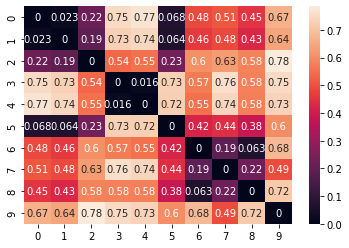

In [25]:
import gower

import numpy as np 
from pandas import DataFrame
import seaborn as sns
%matplotlib inline


distance_matrix = gower.gower_matrix(dataframe)
sns.heatmap(distance_matrix, annot=True);

In [24]:
pd.DataFrame(distance_matrix)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


In [22]:
distance_matrix.shape

(10, 10)

In [38]:
#KNN using the gower matrix

from sklearn.cluster import KMeans
# Configuring the parameters of the clustering algorithm
KNN_cluster = KMeans(n_clusters=4)
# Fitting the clustering algorithm
KNN_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
dataframe["cluster_KNN"] = KNN_cluster.labels_



#DBSCAN using the gower matrix
from sklearn.cluster import DBSCAN
# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
dataframe["cluster"] = dbscan_cluster.labels_

In [39]:
dataframe

,age,gender,civil_status,salary,has_children,purchaser_type,cluster,cluster_KNN
0,22,M,SINGLE,18000,False,LOW_PURCHASER,0,1
1,25,M,SINGLE,23000,False,LOW_PURCHASER,0,1
2,30,F,SINGLE,27000,False,LOW_PURCHASER,0,1
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER,1,0
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER,1,0
5,47,M,SINGLE,20000,False,LOW_PURCHASER,0,1
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER,2,2
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER,2,2
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER,2,2
9,90,M,DIVORCED,70000,True,LOW_PURCHASER,-1,2


# Adding informations from transactions 

The first idea is to add the price of the article, indeed. The problem is that it is hard to say, as there are probably sales periods. My proposition is simply to take the average of all the prices the item had.

In [5]:
transactions = pd.read_csv('../../raw_data/transactions_train.csv')

In [12]:
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


In [6]:
a = transactions.sort_values(by = 'article_id', ascending = False)

In [83]:
b = a[['article_id','price']].groupby('article_id').mean()

In [84]:
articles =  articles.merge(b, how='left', on='article_id')

In [94]:
articles['price'].isna().sum()

995

In [ ]:
def pricing(price):
    if price  and:
        return 0

In [71]:

len(articles)
min(articles['price_x'])
104547-104547/3
# total : 104547
# We try to divide into 3: cheap, middle and expensive.

len(articles[articles['price_x'] >0.0168])
articles['count'] = 1
articles[['count','price_x']].groupby('price_x').sum().plot(figsize =(20,10))

67388

In [98]:
articles.dropna(inplace = True)

In [99]:
articles

,article_id,Denim,Patterns,Solid,adult,teenager,kid,baby,male,female,obese,Red,Green,Blue,Accessories,Blouses,Dressed,Dresses Ladies,Dresses/Skirts girls,Jersey Basic,Jersey Fancy,Knitwear,Outdoor,Shirts,Shoes,Shorts,Skirts,Socks and Tights,Special Offers,Swimwear,Trousers,Trousers Denim,"Under-, Nightwear",Unknown,Woven/Jersey/Knitted mix Baby,price
0,108775015,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.008142
1,108775044,0,0,1,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.008114
2,108775051,0,1,0,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.004980
3,110065001,0,0,1,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.020219
4,110065002,0,0,1,1,0,0,0,0,0,0,255.0,255.0,255.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.018205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105534,952267001,0,1,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.014982
105536,952938001,0,1,0,1,0,0,0,0,0,0,57.0,45.0,43.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.048006
105537,953450001,0,1,0,1,0,0,0,0,0,0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0.016836
105538,953763001,0,0,1,1,0,0,0,0,0,1,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.021908


In [100]:
articles.to_csv('articles_processed.csv')